# Linear regression

## Welcome!
We are going to dive into powerful universe of machine learning models. 

We will start with one of the easiest ones - linear regression. Though simple, it will introduce you to a number of important concepts, which are very much valid, when studying more sophisticated models such as neural networks.

The idea of learning and intuition will be the same in almost all models, so make sure that you understand upcoming concepts first.

In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed
import ipywidgets as widgets
import sklearn as sk
from typing import Tuple, List
import solutions

%matplotlib inline

## The problem of regression

Consider two series' of numbers:

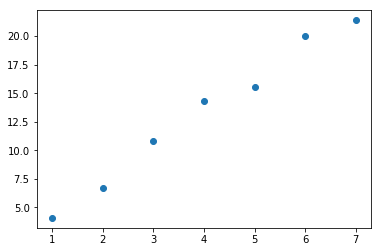

In [112]:
X = np.array([1, 2, 3, 4, 5, 6, 7])
Y = np.array([4.1, 6.7, 10.8, 14.3, 15.5, 20.0, 21.37])

plt.scatter(X, Y)
plt.show()

It can be clearly seen that there is a relationship between $X$ and $Y$. Moreover, this relationship is close to one of the simplest ones - it's linear. 

In other words:

## $$y = w_0 + w_1 \cdot x$$

But how to find the good - or, as we'll say more often - **optimal** $w_0$ and $w_1$ for those two sets of data?

## Loss function 

Whenever you set yourself a goal, a good thing to figure out is how will you know you're satisfied (or not) with your results.

In Machine Learning, the concept of **loss function** (or cost function) embodies this question. You can think of it as a metric that tells how satisfied you are with your solution. The better your model, the lower the loss.

Of course, you have to evaluate your solution - or **model** in terms of the data you are interested in. So the loss function would have a form of

### $$loss(model, input\_data, output\_data)$$

or:

### $$L(W, X, Y)$$

Where:
* $L$ - loss function
* $W$ - the model
* $X$ - the input data
* $Y$ - the output data

In this example, the model $W$ is simply the numbers $(w_0, w_1)$ we want to find. 
However, this won't always be such a simple case! 

### Let's define the loss function!
What do you think would be the best way to measure how well some $(w_0, w_1)$ capture the relationship between our $X$ and $Y$?

Some important points to consider:
* the better $(w_0, w_1)$ fit the actual data, the lower the loss
* the loss shouldn't be dependent on the amount of the data, only on how well the model fits it!

In [4]:
def my_loss(w_0: float, w_1: float, X: np.ndarray, Y: np.ndarray) -> float:
    L = 0
    for i in range(0, len(X)):
        #tmp = w_1*X[i]+w_0 - Y[i]
        #L += tmp*tmp
        tmp = w_1*X[i]+w_0
        L += (w_1*X[i]-Y[i]+w_0)*(w_1*X[i]-Y[i]+w_0)/(w_1*w_1+1)
    return L/len(X)

In [5]:
# if you get stuck, check out the solutions script
# where you will find both the naive and vectorized solutions
# it's more rewarding to figure them out on your own, though!
#my_loss = solutions.my_loss
#my_loss = solutions.my_loss_vectorized

In [6]:
# for a sanity check, you can check 
# how your solutions with some random arguments and see 
# if it's consistent with provided solutions
w_0 = np.random.rand()
w_1 = np.random.rand()

print('your solution:', my_loss(w_0, w_1, X, Y)) 
print('provided solution (naive)', solutions.my_loss(w_0, w_1, X, Y)) 
print('provided solution (vectorized)', solutions.my_loss_vectorized(w_0, w_1, X, Y))

your solution: 135.33566784211556
provided solution (naive) 153.16168336813666
provided solution (vectorized) 153.16168336813666


## How to find the optimal $(w_0, w_1)$?

Now that we have a way to measure the quality of our model, how can we find an optimal-enough one?

### Manually

In [113]:
def plot_linear_model(w_0: float, w_1: float, X: np.ndarray, Y: np.ndarray):
    Y_pred = w_0 + w_1 * X 
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, 'r')
    plt.show()
    print('w_0:', w_0)
    print('w_1:', w_1)
    print('Loss:', my_loss(w_0, w_1, X, Y))
    
interact(plot_linear_model, 
         w_0=(-5.0, 5.0), 
         w_1=(-5.0,5.0),
         X=fixed(X),
         Y=fixed(Y)
        )

interactive(children=(FloatSlider(value=0.0, description='w_0', max=5.0, min=-5.0), FloatSlider(value=0.0, des…

<function __main__.plot_linear_model(w_0: float, w_1: float, X: numpy.ndarray, Y: numpy.ndarray)>

### Analytically

 $$L = \frac{1}{N}\sum_{i=0}^N(h_W(x^{(i)}) - y^{(i)})^2 $$
As our loss function is not *that* complicated, one could use a least-squares method and  calculate it's derivative in terms of $w_0$ and $w_1$ and see which values minimize it. 
In this case, it would even work:

In [109]:
w_1, w_0 = np.polyfit(X, Y, deg=1)
plot_linear_model(w_0, w_1, X, Y)

NameError: name 'plot_linear_model' is not defined

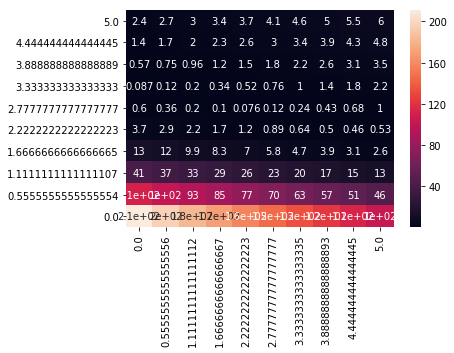

In [7]:
n_cases = 10
w_0_space = np.linspace(0, 5, n_cases)
w_1_space = np.linspace(5, 0, n_cases)
loss_grid = np.zeros((n_cases, n_cases))
for i in range(n_cases):
    for j in range(n_cases):
        w_1 = w_1_space[i]
        w_0 = w_0_space[j]
        loss_grid[i][j] = my_loss(w_0, w_1, X, Y)

sns.heatmap(loss_grid, xticklabels=w_0_space, yticklabels=w_1_space, annot=loss_grid)

However, in tougher cases, there would be much more than one global extrema and a much wider space of $W$ to consider.

### Using an ML method!

Searching through the whole space of $W$ is computationally expensive. What if there was a technique to navigate through it more intelligently?

Though normally there's no plausible way of generating a loss map such as above, we don't really need to know the loss throughout the whole space of solutions - we only want to find a place, where the loss will be lower than where we are currently.

#### Enter Gradient Descent!

The main idea of gradient descent is to repeatedly shift the weights of the model, until it finds a minimum of the loss function:

![The idea of Gradient Descent](img/gradient_descent_0.png)

#### But how to shift weights?

If you know how to calculate the value of $L(w_0, w_1, X, Y)$ for a particular $(w_0, w_1)$, you can also get a basic intuition about how that value is expected to change, should you shift $w_0$ or $w_1$ a bit from that point. 

Do you know a math operation that does that?

#### It's a simple derivative!

Therefore, calculating the **values** of $\dfrac{\partial L}{\partial w_0}$ and $\dfrac{\partial L}{\partial w_1}$ **specifically at** $(w_0, w_1)$ tells you how the loss is expected to shift when $(w_0, w_1)$ will shift.

Especially, for any parameter $w$ if the value of $\dfrac{\partial L}{\partial w}$ is positive, we suspect that increasing $w$ will lead to increase of $L$ and decreasing $w$ will lead to decrease in $L$. 

Another intuition is that the bigger absolute value of $\dfrac{\partial L}{\partial w}$ is, the bigger (positive or negative) impact shifting of $w$ will have on $L$.

![Gradient descent intuition](img/gradient_descent_1.png)

What are the expressions for $\dfrac{\partial L}{\partial w_0}$ and $\dfrac{\partial L}{\partial w_1}$ ? 

In [10]:
def dLdw_0(w_0: float, w_1: float, X: np.ndarray, Y: np.ndarray) -> float:
    dL = 0
    for i in range(0, len(X)):
        dL += 2*(w_1*X[i]-Y[i]+w_0)
    return dL/len(X)/(w_1*w_1+1)    

def dLdw_1(w_0: float, w_1: float, X: np.ndarray, Y: np.ndarray) -> float:
    dL = 0
    for i in range(0, len(X)):
        dL += (2*X[i]*(w_1*X[i]-Y[i]+w_0)-(w_1*X[i]-Y[i]+w_0)*(w_1*X[i]-Y[i]+w_0)*2*w_1)
    return dL/(len(X)*(w_1*w_1+1)*(w_1*w_1+1)) 

In [11]:
#dLdw_0 = solutions.dLdw_0
#dLdw_1 = solutions.dLdw_1

In [19]:
# for a sanity check, you can check 
# how your solutions with some random arguments and see 
# if it's consistent with provided solutions
w_0 = np.random.rand()
w_1 = np.random.rand()

print('your solution:', dLdw_0(w_0, w_1, X, Y), dLdw_1(w_0, w_1, X, Y)) 
print('provided solution ', solutions.dLdw_0(w_0, w_1, X, Y), dLdw_1(w_0, w_1, X, Y)) 

your solution: -20.378811879092527 -182.52444297320622
provided solution  -23.40208565843931 -182.52444297320622


Those are huge gradients! 
#### We now know in which direction to update the weights. But we still don't know - how much?

In [25]:
w_0 = np.random.rand()
w_1 = np.random.rand()
w_0, w_1, my_loss(w_0, w_1, X, Y)

(0.1762818894174476, 0.8824296208367923, 61.31444456925327)

In [26]:
# calculate gradient updates
dw_0 = dLdw_0(w_0, w_1, X, Y)
dw_1 = dLdw_1(w_0, w_1, X, Y)

#update dradients
w_0 -= dw_0 
w_1 -= dw_1 

#calculate new loss
w_0, w_1, my_loss(w_0, w_1, X, Y)

(10.911035575928322, 91.13556926458654, 19.53649113507789)

The loss has shot through the roof!

That's why, when we perform our updates, we need to introduce some moderation. 

Updating the weights with the *exact* values of their respective gradients is never a good idea. 

That's why gradients are multiplied by a parameter called **learning rate** which tunes the speed of updating weights, so, in a way, decides how quickly your model learns.

![Learning rates](img/learning_rate.png)

#### Now we are ready to implement a simple linear regressor!

First, write a function that will perform a single gradient step:
* calculate the loss for the given $(w_0, w_1)$
* calculate $\dfrac{\partial L}{\partial w_0}$ and $\dfrac{\partial L}{\partial w_1}$
* calculate updated $(w_0, w_1)$ according to calculated gradients and the learning_rate
* return updated $(w_0, w_1)$ and the calculated loss for their previous values

In [45]:
# hint - my_loss, dLdw0 and dLdw1 should be helpful here!
def gradient_step(
    w_0: float, 
    w_1: float, 
    X: np.ndarray, 
    Y: np.ndarray, 
    learning_rate: float
) -> Tuple[float, float, float]:
    pl = my_loss(w_0,w_1,X,Y)
    dw0 = dLdw_0(w_0,w_1,X,Y)
    dw1 = dLdw_1(w_0,w_1,X,Y)
    w_0 -= learning_rate*dw0
    w_1 -= learning_rate*dw1
    return w_0, w_1, pl
    

In [46]:
# if you get stuck, check out the solutions script
# where you will find both the naive and vectorized solutions
# it's more rewarding to figure them out on your own, though!
#gradient_step = solutions.gradient_step_naive
#gradient_step = solutions.gradient_step_vectorized

In [52]:
# for a sanity check, you can check 
# how your solutions with some random arguments and see 
# if it's consistent with provided solutions

w_0 = np.random.rand()
w_1 = np.random.rand()
learning_rate = 0.1

print('your solution', gradient_step(w_0, w_1, X, Y, learning_rate))
print('provided solution (naive)', 
      solutions.gradient_step_naive(w_0, w_1, X, Y, learning_rate))
print('provided solution (vectorized)', 
      solutions.gradient_step_vectorized(w_0, w_1, X, Y, learning_rate))

your solution (2.5332558611270892, 17.388458654149286, 186.50567628595354)
provided solution (naive) (2.588146609143153, 12.471878776138764, 190.66390526921518)
provided solution (vectorized) (2.588146609143153, 12.471878776138764, 190.66390526921518)


## We're ready to train a first model!

To find the optimal $(w_0, w_1)$, now write a function which, given initial weights, data and the learning rate will perform the gradient step a number of times and return the final $(w_0, w_1)$.

Observing how the loss changes throughtout the training can often provide an invaluable insight on how well the model is working.

In order to later visualize the loss, return a list of calculated losses for each iteration as well.

In [120]:
def train_model(
    init_w_0: float,
    init_w_1: float,
    X: np.ndarray,
    Y: np.ndarray,
    learning_rate: float,
    num_iterations: int
) -> Tuple[float, float, List[float]]:
    losses = []
    w_0 = init_w_0
    w_1 = init_w_1
    while(num_iterations>0):
        w_0, w_1, l = gradient_step(w_0,w_1,X,Y,learning_rate)
        losses.append(l)
        num_iterations=num_iterations-1
    return w_0, w_1, losses

In [121]:
# if you get stuck, check out the solutions script
# where you will find both the naive and vectorized solutions
# it's more rewarding to figure them out on your own, though!

#train_model = solutions.train_model

In [130]:
init_w_0 = np.random.rand()
init_w_1 = np.random.rand()
learning_rate = 0.001
num_iterations = 1000

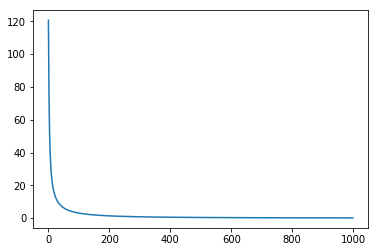

In [131]:
trained_w_0, trained_w_1, loss_history = \
    train_model(init_w_0, init_w_1, X, Y, learning_rate, num_iterations)

plt.plot(list(range(num_iterations)), loss_history)

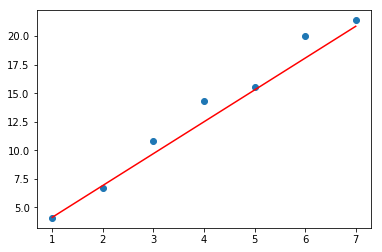

w_0: 1.3556080001413857
w_1: 2.7854129899418587
Loss: 0.13918194094410813


In [132]:
plot_linear_model(trained_w_0, trained_w_1, X, Y)

The model with the default `learning rate` and `num_iterations` shouldn't laern very well. Try experimenting with various values and see if you can find their combination for which the model will train nicely!

# Congratulations! You've just coded your first Machine Learning model!

Now play with it as you wish!
* what happens when you change learning rate?
* what about the number of iterations?
* how would the model behave if trained on a more complex dataset?

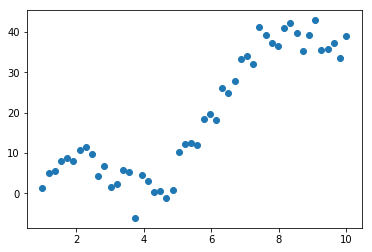

In [134]:
X_hard = solutions.X_hard
Y_hard = solutions.Y_hard
plt.scatter(X_hard, Y_hard)

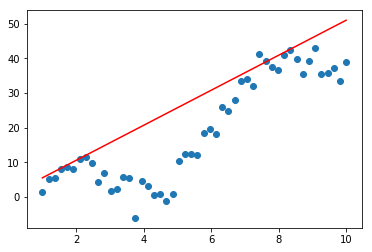

w_0: 0.4460317191427561
w_1: 5.05192662649352
Loss: 5.22832439729225


In [135]:
thw0, thw1, l = train_model(init_w_0, init_w_1, X_hard, Y_hard, learning_rate, num_iterations)
plot_linear_model(thw0, thw1, X_hard, Y_hard)

## Bonus - linear regression with scikit-learn

As you may have already guessed, there are python liobraries which provide higher-level API for various machine Learning problems. One with of the richest (though not the best for real-life applications) is scikit-learn (http://scikit-learn.org/).

It provides implementations for various simple algorithms, useful in ML and Data Science.

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
X_2d = X.reshape(-1, 1) 
# input to the model must be of shape [n_examples, 1] 
# why?

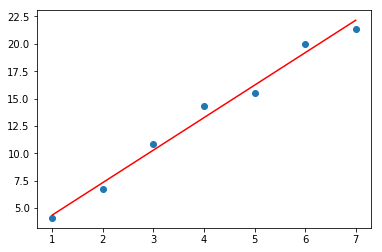

In [83]:
regressor = LinearRegression()
regressor.fit(X_2d, Y, )
Y_pred = regressor.predict(X_2d)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

What are the actual weights the model has learned?

In [137]:
sk_w_1 = regressor.coef_[0]
sk_w_0 = regressor.intercept_
sk_w_0, sk_w_1

(1.3800000000000026, 2.9682142857142852)

And what are the weights learnt by our model?

In [136]:
trained_w_0, trained_w_1

(1.3556080001413857, 2.7854129899418587)

Not bad!